In [1]:
import ROOT
import matplotlib.pyplot as plt
import numpy as np
import goofit as gf
import uproot
import multiprocessing

Welcome to JupyROOT 6.26/04


In [2]:
data = uproot.open("filtered_data/mass.root:CandidateTree").arrays(library="np")["candidate_vMass"]

In [3]:
mass = gf.Observable('mass', 5.33, 5.4)
mean = gf.Variable('mu', 5.37, 5.33, 5.4)
sigma = gf.Variable('sigma', 0.1, 0.01, 0.2)
gauss = gf.GaussianPdf("gauss", mass, mean, sigma)

# sigma2 = gf.Variable('sigma2', 0.01, 0.001, 0.1)
# gauss2 = gf.PolynomialPdf("gauss2", mass, mean, sigma2)


In [4]:
a0_0 = gf.Variable("a0_0", 1.0)

poly0 = gf.PolynomialPdf("poly0", mass, [a0_0])

In [5]:
# a0 = gf.Variable("a0", 1.2, 1, 2)
# a1 = gf.Variable("a1", 0.5, 0.0, 1.0)
# a2 = gf.Variable("a2", -0.2, 0.0, 1.0)
a1_0 = gf.Variable("a1_0", 0.0)
a1_1 = gf.Variable("a1_1", 1.0)

poly1 = gf.PolynomialPdf("poly1", mass, [a1_0, a1_1])

In [6]:
a2_0 = gf.Variable("a2_0", -1.0)
a2_1 = gf.Variable("a2_1", 0.0)
a2_2 = gf.Variable("a2_2", 2.0)

poly2 = gf.PolynomialPdf("poly2", mass, [a2_0, a2_1, a2_2])

In [25]:
a0 = gf.Variable("a0", 1.0)
a1 = gf.Variable("a1", 0.5, 0.0, 1.0)
a2 = gf.Variable("a2", -0.3, -0.5, 1.0)

chebyshev = gf.AddPdf('bkg', [a0, a1, a2], [poly0, poly1, poly2])

In [17]:
f0 = gf.Variable('f_0', .5, 0, 1)

In [18]:
pdf = gf.AddPdf('pdf', [f0], [gauss, chebyshev])

In [19]:
ds = gf.UnbinnedDataSet(mass)
ds.from_matrix([data], filter=True)

In [20]:
pdf.fitTo(ds)

MnSeedGenerator: for initial parameters FCN = -1066182.317419
MnSeedGenerator: Initial state:   - FCN =  -1066182.317419 Edm =      1397.94 NCalls =     19
VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =  -1066182.317419 Edm =      1397.94 NCalls =     19
VariableMetric: Iteration #   0 - FCN =  -1066182.317419 Edm =      1397.94 NCalls =     19
VariableMetric: Iteration #   1 - FCN =  -1067404.322236 Edm =     0.421369 NCalls =     37
VariableMetric: Iteration #   2 - FCN =  -1067404.720869 Edm =    0.0362718 NCalls =     50
VariableMetric: Iteration #   3 - FCN =  -1067405.180052 Edm =     0.562585 NCalls =     69
VariableMetric: Iteration #   4 - FCN =  -1067406.681551 Edm =      1.62153 NCalls =     86
VariableMetric: Iteration #   5 - FCN =  -1067407.645364 Edm =     0.456133 NCalls =    101
VariableMetric: Iteration #   6 - FCN =  -1067408.071636 Edm =     0.387909 NCalls =    114
VariableMetric: Iteration #   7 - FCN =  -1067408.3950

Info: VariableMetricBuilder: no improvement in line search
Info: VariableMetricBuilder: machine accuracy limits further improvement.
Info in matrix forced pos-def by adding to diagonal : padd = 0.0581807
Info: MnHesse: matrix was forced pos. def. 
Info: VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
Info in Current  Edm is : edm = 47.8707
Info in Required Edm is : edmval = 0.0001
Info: DavidonErrorUpdator: delgam < 0 : first derivatives increasing along search line
Info: VariableMetricBuilder: matrix not pos.def, gdel > 0
Info: gdel = 0.0323524
Info in negative or zero diagonal element in covariance matrix : i = 3
Info in negative or zero diagonal element in covariance matrix : i = 4
Info in added to diagonal of Error matrix a value : dg = 3.41607
Info: gdel = -2101.06
Info: VariableMetricBuilder: no improvement in line search
Info: VariableMetricBuilder: iterations finish without convergence.
Info in VariableMetricBuilder : edm = 0.202216
Info in        

In [21]:
f0.value

0.5791795144001594

In [22]:
grid1, points1 = gauss.evaluatePdf(mass)
xs1 = grid1.to_matrix().flatten()
points1 = np.asarray(points1)

grid2, points2 = chebyshev.evaluatePdf(mass)
xs2 = grid2.to_matrix().flatten()
points2 = np.asarray(points2)

In [23]:
grid, points = pdf.evaluatePdf(mass)
xs = grid.to_matrix().flatten()

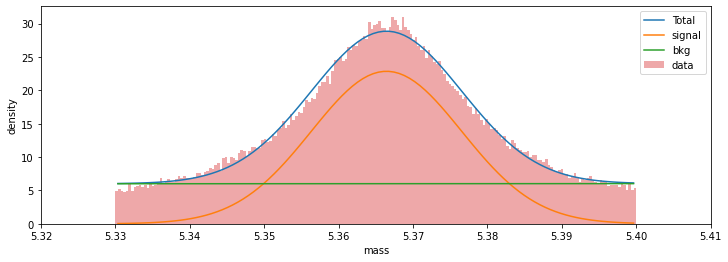

In [24]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(xs, points, label='Total')
ax.plot(xs1, points1 * f0.value, label = "signal")
ax.plot(xs2, points2 * (1 - f0.value), label = "bkg")
ax.hist(data, bins=200, density=True, alpha=.4, label='data')
ax.set_xlim(5.32, 5.41)
ax.set_xlabel('mass')
ax.set_ylabel('density')
plt.legend()
plt.show()